In [2]:
import os

In [4]:
data_folder = r"C:\Users\simon\vibration_analysis\vibration_analysis_nov\data\HUST bearing a practical dataset for ball bearing fault diagnosis\HUST bearing a practical dataset for ball bearing fault diagnosis\HUST bearing dataset"
mat_files = [os.path.join(data_folder, file) for file in os.listdir(data_folder) if file.endswith('.mat')]
print(mat_files)

['C:\\Users\\simon\\vibration_analysis\\vibration_analysis_nov\\data\\HUST bearing a practical dataset for ball bearing fault diagnosis\\HUST bearing a practical dataset for ball bearing fault diagnosis\\HUST bearing dataset\\B500.mat', 'C:\\Users\\simon\\vibration_analysis\\vibration_analysis_nov\\data\\HUST bearing a practical dataset for ball bearing fault diagnosis\\HUST bearing a practical dataset for ball bearing fault diagnosis\\HUST bearing dataset\\B502.mat', 'C:\\Users\\simon\\vibration_analysis\\vibration_analysis_nov\\data\\HUST bearing a practical dataset for ball bearing fault diagnosis\\HUST bearing a practical dataset for ball bearing fault diagnosis\\HUST bearing dataset\\B504.mat', 'C:\\Users\\simon\\vibration_analysis\\vibration_analysis_nov\\data\\HUST bearing a practical dataset for ball bearing fault diagnosis\\HUST bearing a practical dataset for ball bearing fault diagnosis\\HUST bearing dataset\\B600.mat', 'C:\\Users\\simon\\vibration_analysis\\vibration_analys

In [5]:
import scipy.io

# Replace 'your_file.mat' with the path to your .mat file
data = scipy.io.loadmat(mat_files[0])

# This will show you the keys, kinda like a map to your data treasure!
print(data.keys())

# To access a specific part of the data, use the key like data['key_name']
# You can plot or analyze it depending on what you're looking for


dict_keys(['__header__', '__version__', '__globals__', 'data', 'fs', 'rpm', 'ru'])


In [12]:
import scipy.io
from bokeh.plotting import figure, show, output_notebook

# Load your data
data = scipy.io.loadmat(mat_files[0])


# Extract the 'data' part and flatten it to 1D
plot_data = data['data'].flatten()

import numpy as np

# Downsample your data. Change the value of 'n' to adjust the level of downsampling
n = 10000  # For example, every 50th data point
downsampled_x = np.arange(0, len(plot_data), n)
downsampled_y = plot_data[::n]

# Plotting the downsampled data
p = figure(title="Downsampled Vibration Data Visualization", x_axis_label='Index', y_axis_label='Vibration Value')
p.line(downsampled_x, downsampled_y, legend_label="Downsampled Vibration Data", line_width=2)
show(p)


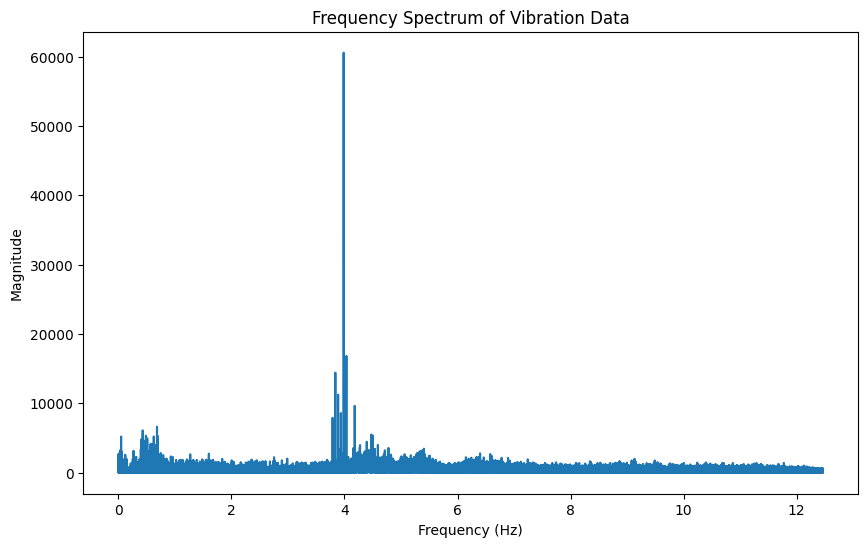

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = scipy.io.loadmat(mat_files[0])
vibration_data = data['data'].flatten()

# Sampling frequency 'fs' if provided, otherwise assume a default value
fs = data.get('fs', 1).flatten()[0]

# Perform FFT
fft_result = np.fft.fft(vibration_data)

# Compute the frequencies for each FFT result
freqs = np.fft.fftfreq(len(fft_result), 1/fs)

# Get the magnitude of the FFT and corresponding frequencies (ignoring negative frequencies)
fft_magnitude = np.abs(fft_result)[:len(fft_result)//2]
positive_freqs = freqs[:len(freqs)//2]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, fft_magnitude)
plt.title("Frequency Spectrum of Vibration Data")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()


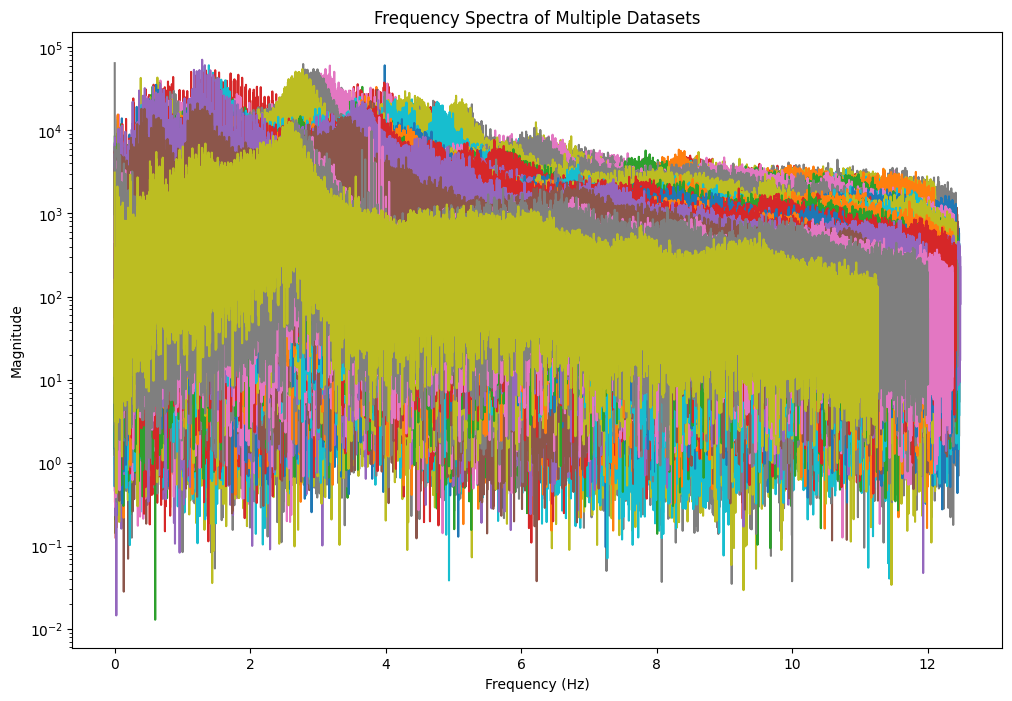

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

# Set up the plot
plt.figure(figsize=(12, 8))

# Loop through each file
for file in mat_files:
    # Load data
    data = scipy.io.loadmat(file)
    vibration_data = data['data'].flatten()

    # Perform FFT
    fft_result = np.fft.fft(vibration_data)

    # Compute frequencies
    fs = data.get('fs', 1).flatten()[0]  # Sampling frequency
    freqs = np.fft.fftfreq(len(fft_result), 1/fs)

    # Get magnitude for positive frequencies
    fft_magnitude = np.abs(fft_result)[:len(fft_result)//2]
    positive_freqs = freqs[:len(freqs)//2]

    # Plot
    plt.plot(positive_freqs, fft_magnitude, label=f'FFT of {file}')

# Add legend, title, and labels
# plt.legend()
plt.title("Frequency Spectra of Multiple Datasets")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.yscale('log')  # Optional: Logarithmic scale for better visibility

# Show the plot
plt.show()


In [27]:
import matplotlib.pyplot as plt
import scipy.io

# Your list of file paths
# mat_files = ['path_to_file1.mat', 'path_to_file2.mat', ...]  # Replace with your actual file paths
mat_file = [mat_files[1]]


# Loop through each file
for file in mat_file:
    # Load data
    data = scipy.io.loadmat(file)
    vibration_data = data['data'].flatten()

    # Sampling frequency
    fs = data.get('fs', 1).flatten()[0]
    print(data.get('ru'))

    # Set up the plot for each file
    plt.figure(figsize=(10, 6))

    # Generate spectrogram
    # NFFT and noverlap are parameters you can tweak according to your data's characteristics
    plt.specgram(vibration_data, NFFT=1024, Fs=fs, noverlap=512, scale='dB')

    # Add title and labels
    plt.title(f"Spectrogram of {file[-9:]}")
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (sec)')

    # Show the plot
    plt.colorbar(label='Intensity [dB]')
    plt.show()


KeyError: 'ru'